## Task 5. Algorithms on graphs. Introduction to graphs and basic algorithms on graphs

### Section 1

In [1]:
import numpy as np
from networkx import nx
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = (100)

In [2]:
n = 100
m = 200
graph = nx.generators.random_graphs.gnm_random_graph(n, m)

Adjacency matrix

In [3]:
adjacency_matrix = nx.adjacency_matrix(graph).todense()
print(adjacency_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Adjacency list

In [4]:
adjacency_list = nx.to_dict_of_lists(graph)
list(adjacency_list.items())[:6]

[(0, [89, 56, 16, 14, 24, 7]),
 (1, [80, 45, 17]),
 (2, [58, 88, 52]),
 (3, [41, 10, 73, 60]),
 (4, [56, 49]),
 (5, [22, 74, 44, 30, 7])]

Graph visualization

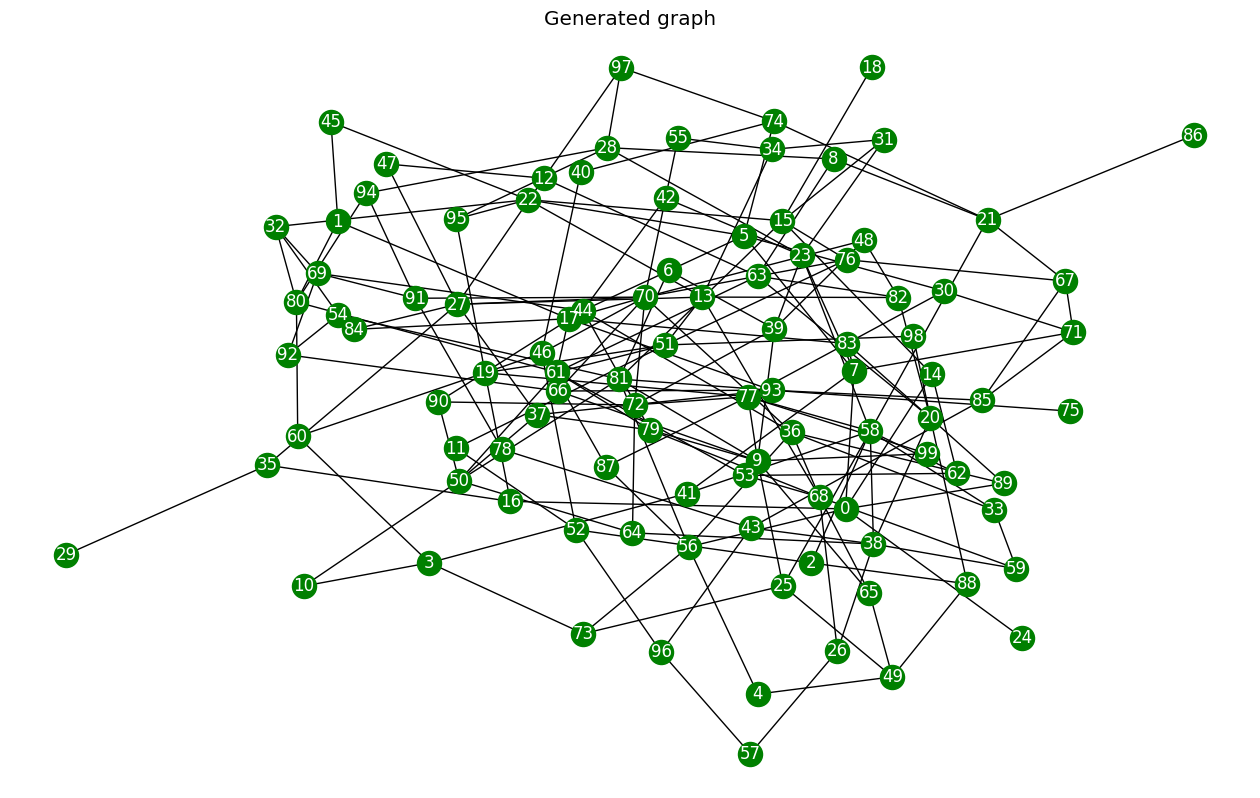

In [5]:
fix_pos = nx.spring_layout(graph, seed=10)
plt.figure(figsize=(16, 10))
plt.title('Generated graph')
nx.draw(graph, pos=fix_pos, with_labels=True, font_color='white', node_color='green', linewidths=1)
fgnm = f'graph.pdf'
plt.savefig("".join((fgnm)))
plt.show()

### Section 2

Use Depth-first search to find connected components of the graph and Breadth-first search to find a shortest path between two random vertices.

In [6]:
def depth_first_search(graph, node, visited=[]):
    if node not in visited:
        visited.append(node)
        for k in graph[node]:
            depth_first_search(graph, k, visited)
    return visited

In [7]:
def breadth_first_search(graph, start, end):
    queue = []
    visited = set()
    queue.append([start])
    visited.add(start)
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node == end:
            return path
        for adjacent in graph.get(node, []):
            if adjacent not in visited:
                visited.add(adjacent)
                new_path = list(path)
                new_path.append(adjacent)
                queue.append(new_path)

In [8]:
connected_components = []
vert = range(n)

while len(vert) != 0:
    component = depth_first_search(graph, vert[0])
    vert = vert[1:]
    connected_components.append(component)
    rest_vert = list(map(lambda x: x not in component, vert))
    vert = vert[rest_vert]

print(connected_components)

[0, 89, 36, 70, 91, 94, 28, 8, 21, 74, 97, 12, 63, 82, 48, 39, 72, 90, 44, 79, 9, 81, 56, 73, 25, 58, 23, 7, 83, 20, 98, 51, 61, 50, 10, 3, 41, 60, 19, 95, 22, 13, 34, 55, 31, 15, 76, 67, 85, 93, 75, 66, 92, 69, 32, 80, 1, 45, 17, 84, 27, 37, 47, 35, 16, 29, 54, 71, 30, 5, 77, 99, 87, 46, 52, 2, 88, 49, 65, 68, 59, 38, 26, 57, 96, 43, 78, 64, 33, 53, 62, 14, 4, 11, 40, 18, 42, 6, 86, 24]


Visualization

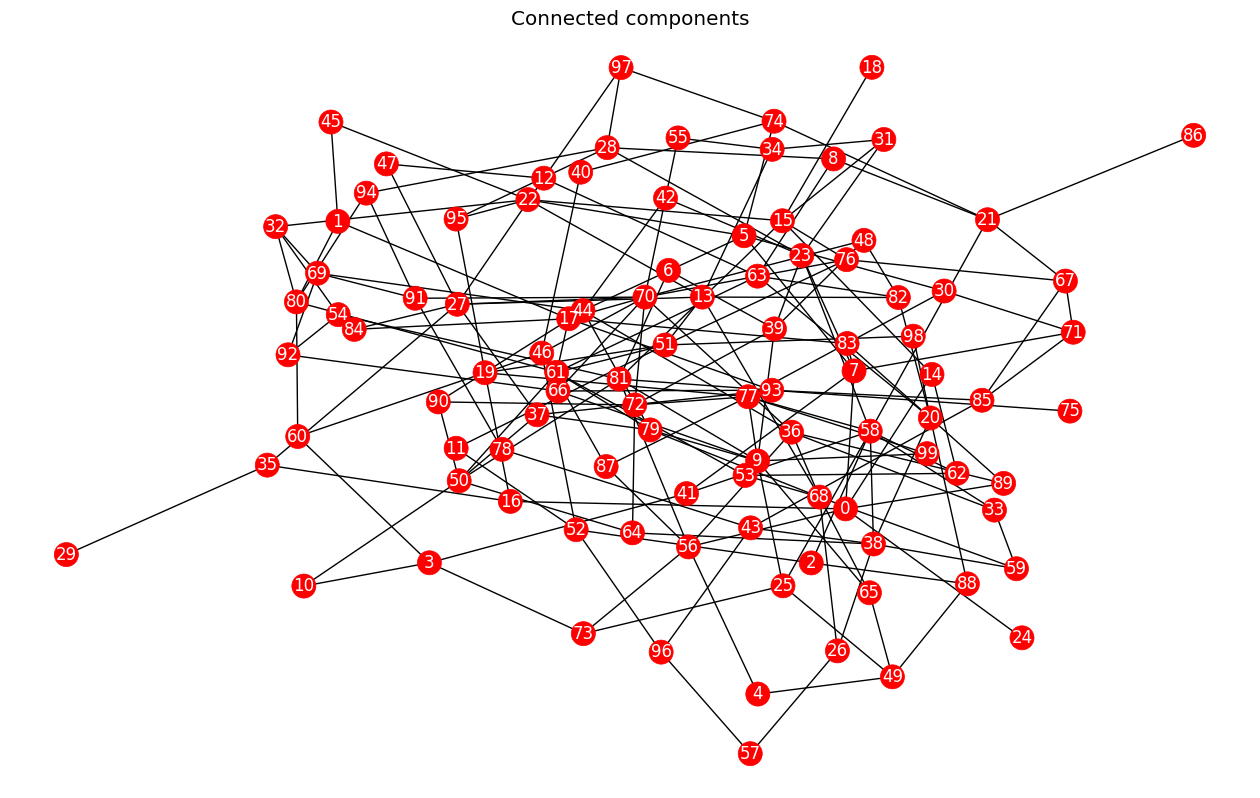

In [9]:
color_map = []
for node in graph:
    if node in visited:
        color_map.append('red')
    else: 
        color_map.append('green')  
plt.figure(figsize=(16, 10))
plt.title('Connected components')
nx.draw(graph, pos=fix_pos, with_labels=True, font_color='white', node_color=color_map)
fgnm = f'connected_components.pdf'
plt.savefig("".join((fgnm)))
plt.show()

In [18]:
shortest_path = breadth_first_search(adjacency_list, 60, 49)

Use built-in function to check correctness of our function result

In [19]:
print(nx.bidirectional_shortest_path(graph, 60, 49))
print(shortest_path) # our result

[60, 3, 73, 25, 49]
[60, 3, 73, 25, 49]


Visualization 

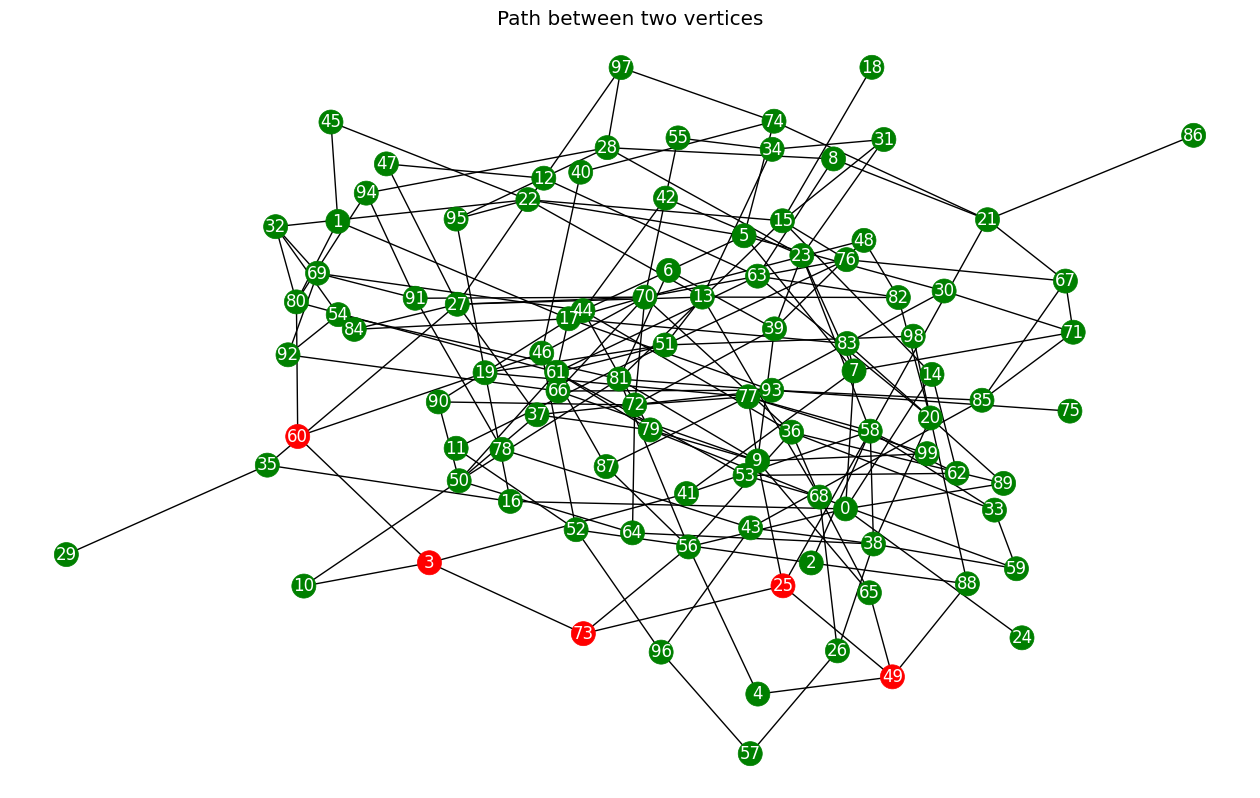

In [20]:
color_map = []
for node in graph:
    if node in shortest_path:
        color_map.append('red')
    else: 
        color_map.append('green')  
plt.figure(figsize=(16, 10))
plt.title('Path between two vertices')
nx.draw(graph, pos=fix_pos, with_labels=True, font_color='white', node_color=color_map)
fgnm = f'path_between_vert.pdf'
plt.savefig("".join((fgnm)))
plt.show()

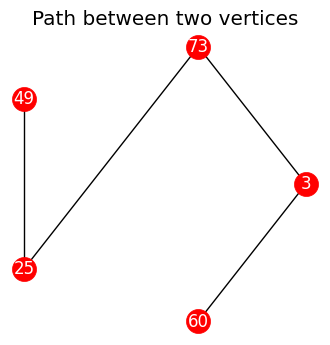

In [23]:
plt.figure(figsize=(4, 4))
plt.title('Path between two vertices')
nx.draw_shell(graph.subgraph(shortest_path), with_labels=True, font_color='white', node_color='red')
fgnm = f'sub_graph.pdf'
plt.savefig("".join((fgnm)))